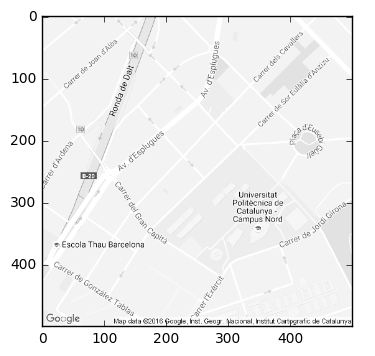

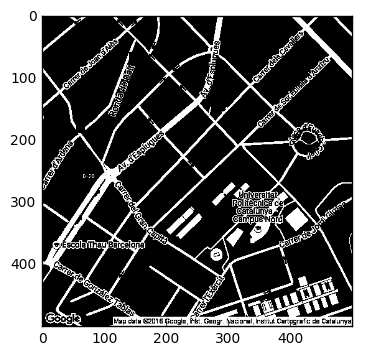

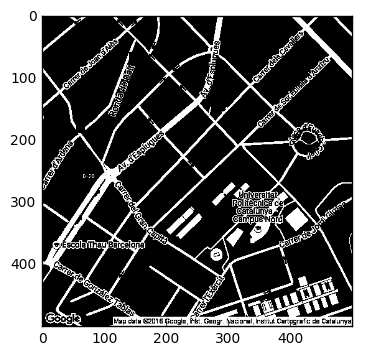

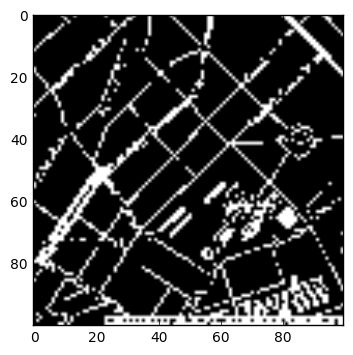

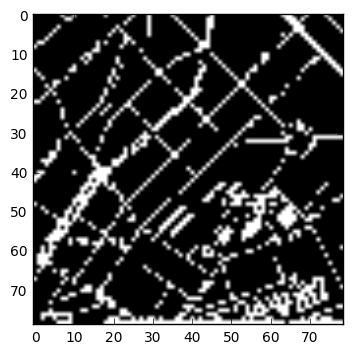

In [23]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import binascii

#experiment with higher and lower resolution
imgB = cv2.imread('../map-16.png',  cv2.CV_LOAD_IMAGE_GRAYSCALE)
imgS = cv2.imread('../map-16.png',  cv2.CV_LOAD_IMAGE_GRAYSCALE)

## uncomment if used outside of jupyter notebook
# cv2.imshow('image',imgB)
# cv2.waitKey(0) & 0xFF
# cv2.destroyWindow('image') 

# grayscaled image
plt.imshow(imgB, cmap='Greys_r')

# thresholding the grayscaled image
tresh = 235
ret, imgB_tresh = cv2.threshold(imgB,tresh,255,cv2.THRESH_BINARY)
ret, imgS_tresh = cv2.threshold(imgS,tresh,255,cv2.THRESH_BINARY)

plt.figure()
plt.imshow(imgB_tresh, cmap='Greys_r')

plt.figure()
plt.imshow(imgS_tresh, cmap='Greys_r')


# rescaling the higher resolution image with cv2
small = cv2.resize(imgB_tresh, (0,0), fx=0.2, fy=0.2) 
plt.figure()
plt.imshow(small, cmap='Greys_r')


# rescaling the higher resolution image with skimage (probably better)
from skimage import data
from skimage.transform import resize

small2 = resize(imgB_tresh, (79, 79))
plt.figure()
plt.imshow(np.round(small2), cmap='Greys_r')

# translating binary image to a bit strind
flat = np.round(small2).flatten().astype(int).astype(str)
bit_string = ""
for e in flat:
    bit_string = bit_string + e


In [94]:
def encode(bit_string):
    key = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789abcdefghijklmnopqrstuvwxyz:;"
    
    ascii_string = ""
    for i in range(0,len(s),6):
        block = s[i:i+6]
        block_id = int("0b"+block,2)

        ascii_string = ascii_string + key[block_id]

    return ascii_string

def decode(ascii_string):
    key = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789abcdefghijklmnopqrstuvwxyz:;"
    
    bit_string = ""
    for c in ascii_string:
        dec = key.index(c)
        temp = bin(dec)
        temp = temp[2:]
        for i in range(6-len(temp)):
            bit_string = bit_string+'0'
            
        bit_string = bit_string + temp
        
    return bit_string

In [98]:
x = encode(s)
y = decode(x)
print s[0:30]
print y[0:30]

print x[0:6]

100000011000000011000000010000
100000011000000011000000010000
6YDAQ;
